Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ml-predict-firewall-actions"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ThatN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ThatN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ThatN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ThatN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

AttributeError: _ARRAY_API not found

Preview unedited data set

In [2]:
import pandas as pd

internet_data = pd.read_csv('internet-firewall-data.csv')

internet_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


Move 'Action' column to last column

In [3]:
column_to_move = 'Action'

new_column_order = [col for col in internet_data.columns if col != column_to_move] + [column_to_move]

internet_data = internet_data[new_column_order]
internet_data2 = internet_data # copy for correlation matrix later

Rename columns to have consistant format

In [4]:
internet_data.rename(columns={'pkts_sent': 'Packets Sent', 'pkts_received': 'Packets Received'}, inplace=True)

internet_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),Packets Sent,Packets Received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop
65530,54870,445,0,0,70,70,0,1,0,1,0,drop


Discover and Visualize the data to gain insights

In [5]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   Packets Sent          65532 non-null  int64 
 10  Packets Received      65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
internet_data["Action"].value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [7]:
internet_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),Packets Sent,Packets Received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


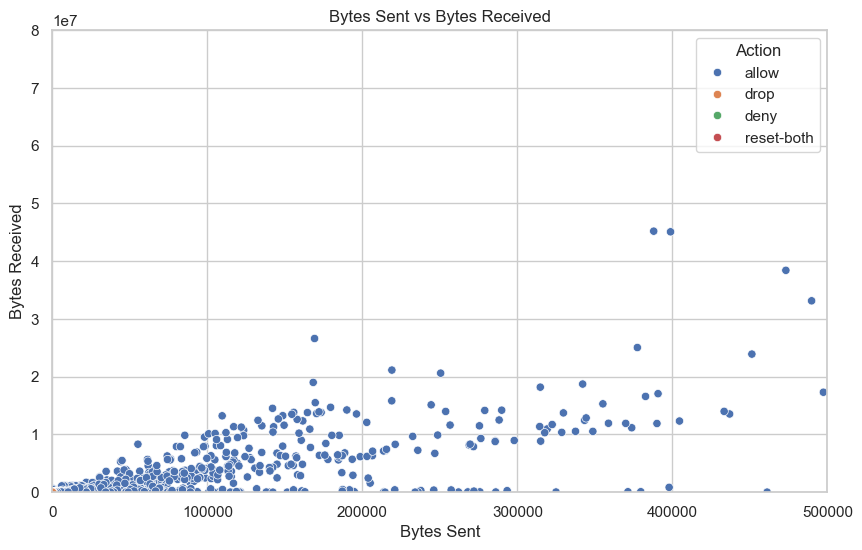

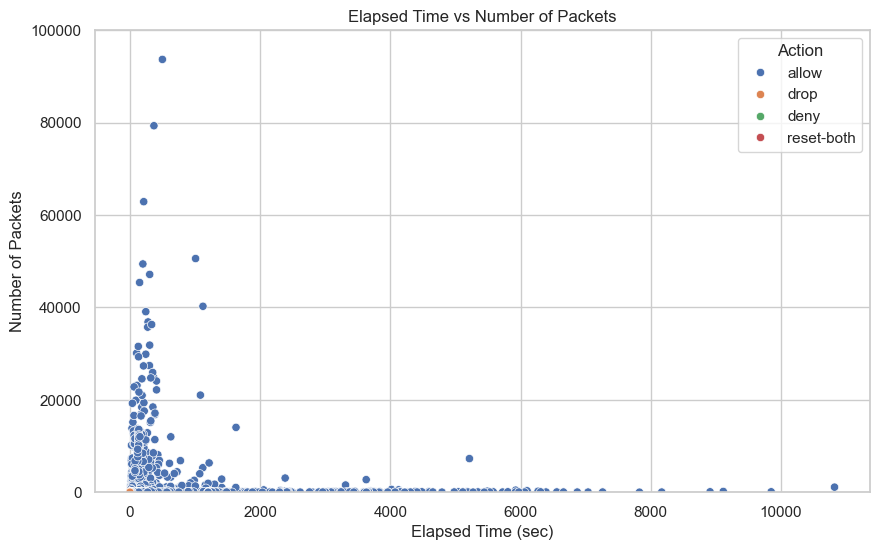

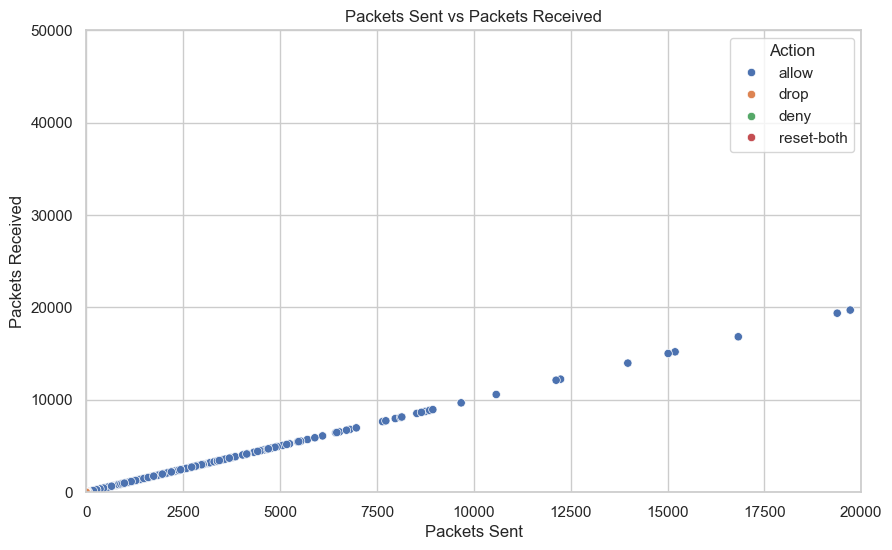

In [8]:
sns.set(style="whitegrid")

# Plot 1: Bytes Sent vs Bytes Received
plt.figure(figsize=(10, 6))
plt.title("Bytes Sent vs Bytes Received")
plt.xlabel("Bytes Sent")
plt.ylabel("Bytes Received")
plot = sns.scatterplot(x="Bytes Sent", y="Bytes Received", data=internet_data, hue="Action")
plot.set(ylim=(0, 80000000))
plot.set(xlim=(0, 500000))
plt.show()

# Plot 2: Elapsed Time (sec) vs Packets
plt.figure(figsize=(10, 6))
plt.title("Elapsed Time vs Number of Packets")
plt.xlabel("Elapsed Time (sec)")
plt.ylabel("Number of Packets")
plot = sns.scatterplot(x="Elapsed Time (sec)", y="Packets", data=internet_data, hue="Action")
plot.set(ylim=(0, 100000))
plt.show()

# Plot 3: Packet Sent vs Packet Received
plt.figure(figsize=(10, 6))
plt.title("Packets Sent vs Packets Received")
plt.xlabel("Packets Sent")
plt.ylabel("Packets Received")
plot = sns.scatterplot(x="Packets Sent", y="Packets Sent", data=internet_data, hue="Action")
plot.set(ylim=(0, 50000))
plot.set(xlim=(0, 20000))
plt.show()

Use Label Encoding to convert the 'Action' feature from categorical to numerical

In [9]:
internet_data['Action'] = internet_data['Action'].astype('category').cat.codes

# Calculate Pearson correlation
correlation_matrix1 = internet_data.corr(method='pearson')
correlation_matrix1

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),Packets Sent,Packets Received,Action
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962,0.038343
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909,0.095110
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772,-0.686893
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747,-0.214765
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209,-0.013546
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098,-0.004570
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039,-0.023794
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978,-0.015562
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954,-0.170684
Packets Sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550,-0.009842


Use One-Hot Encoding to convert the 'Action' feature from categorical to numerical

In [10]:
internet_data_one_hot = pd.get_dummies(internet_data2, columns=['Action'])

# Calculate Pearson correlation
correlation_matrix2 = internet_data_one_hot.corr(method='pearson')
correlation_matrix2

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),Packets Sent,Packets Received,Action_0,Action_1,Action_2,Action_3
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962,0.132189,-0.386728,0.247548,-0.042674
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909,-0.367960,0.687862,-0.271009,0.022247
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772,0.754348,-0.477127,-0.433486,-0.016482
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747,0.235859,-0.149221,-0.135458,-0.005655
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209,0.014869,-0.009405,-0.008532,-0.000496
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098,0.005017,-0.003172,-0.002879,-0.000167
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039,0.026119,-0.016522,-0.014986,-0.000871
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978,0.017083,-0.010806,-0.009802,-0.000566
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954,0.187367,-0.118522,-0.107503,-0.006238
Packets Sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550,0.010804,-0.006834,-0.006199,-0.000356


Correlation Matrix Heatmap

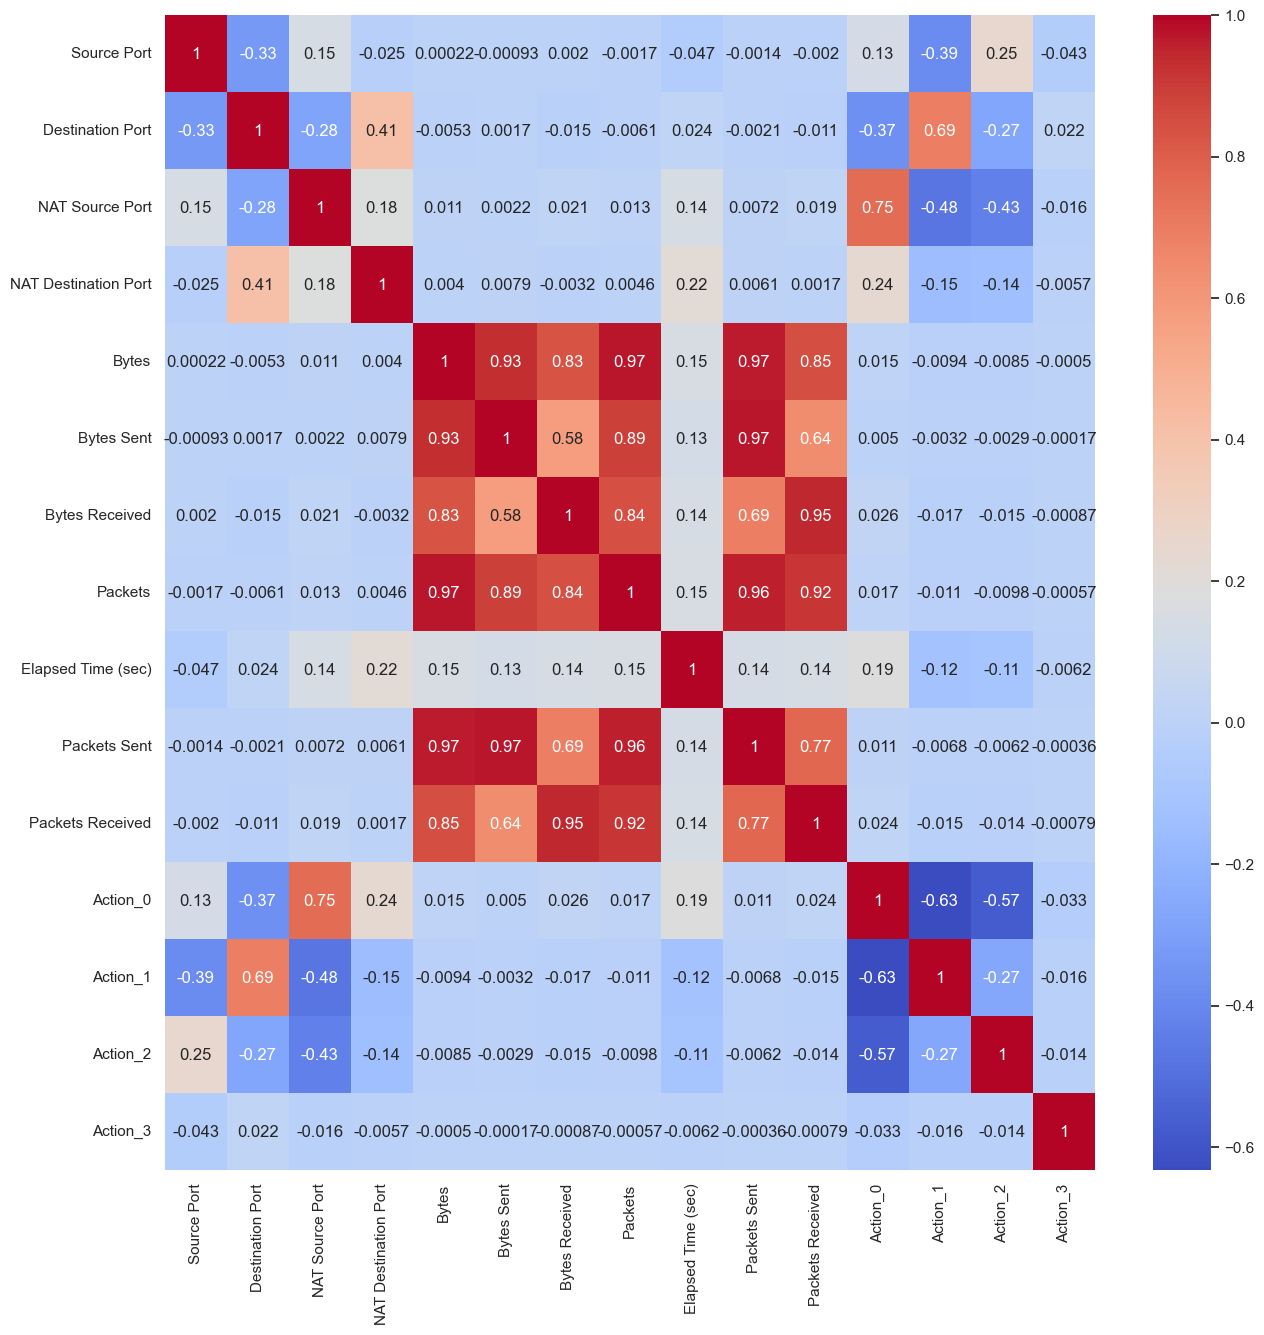

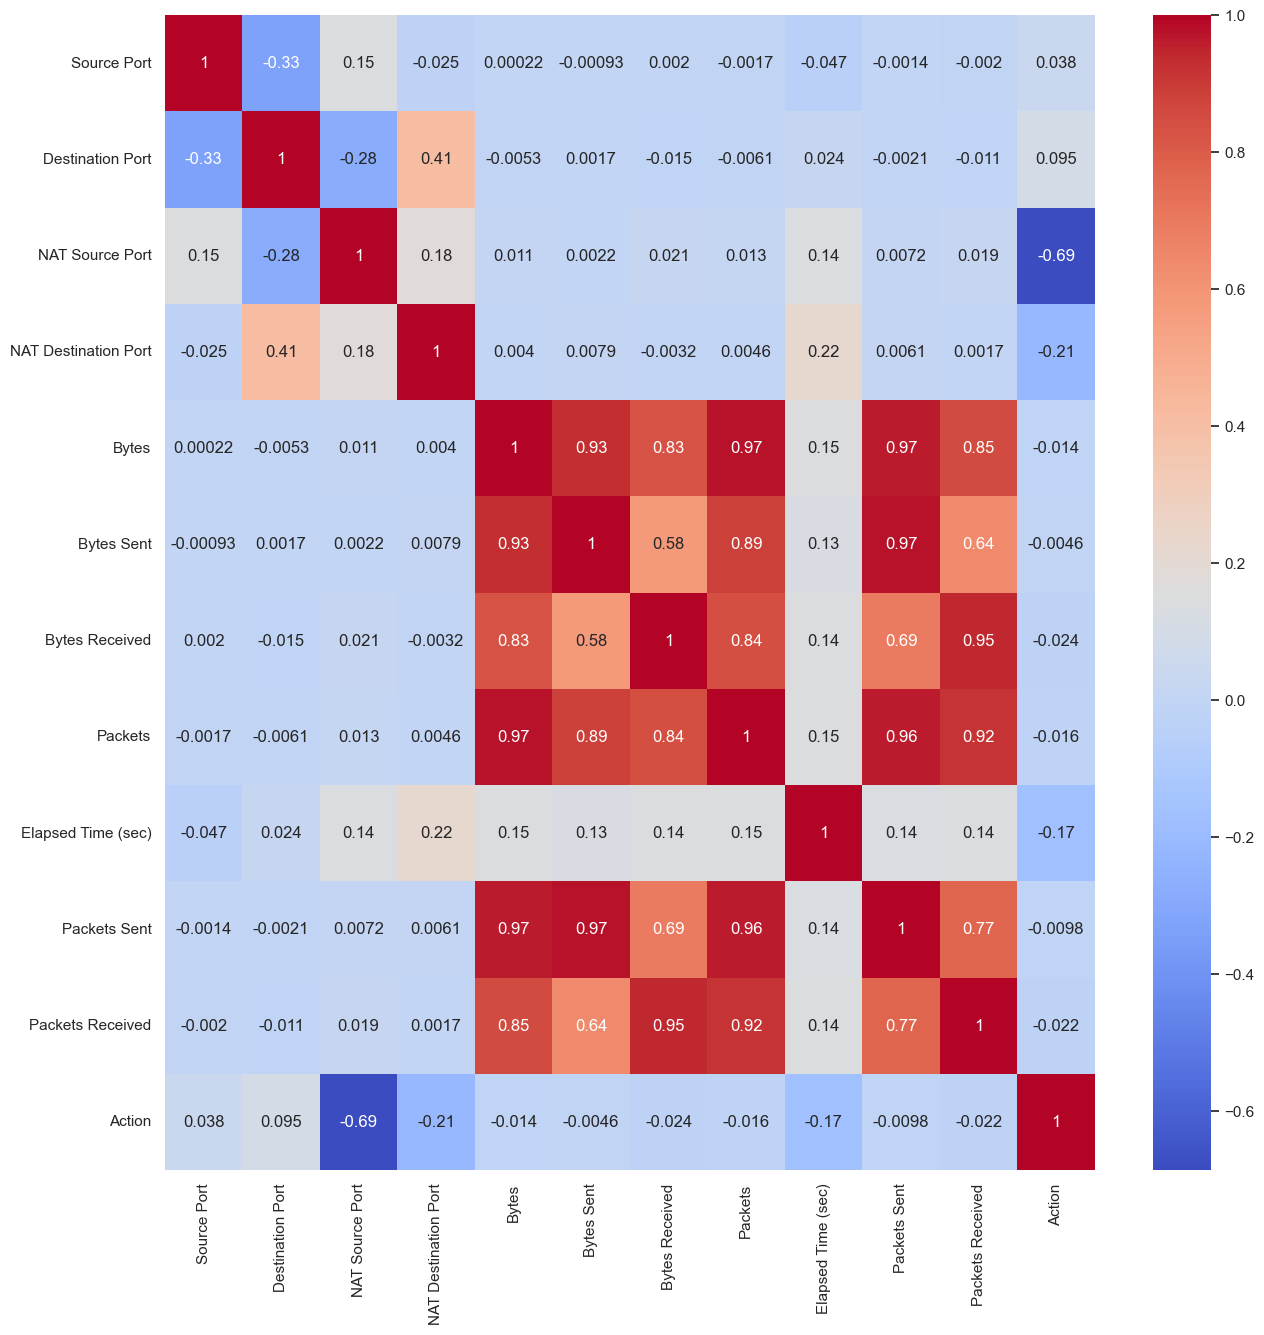

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show heatmap for one-hot encoding correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.show()

# Show heatmap for label encoding correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.show()

Verify that 'Bytes' equals 'Bytes Sent' plus 'Bytes Received' so we can eliminate this column.
This is necessary so we don't have extra weight in our data based on the Bytes features.

In [12]:
internet_data_new = internet_data[['Bytes Sent', 'Bytes Received', 'Bytes']].copy()
internet_data_new['Cal Total Bytes'] = internet_data_new['Bytes Sent'] + internet_data_new['Bytes Received']
internet_data_new['Valid Bytes'] = internet_data_new['Cal Total Bytes'] == internet_data_new['Bytes']
has_false = not internet_data_new['Valid Bytes'].any()
print(has_false)
internet_data_new

False


,Bytes Sent,Bytes Received,Bytes,Cal Total Bytes,Valid Bytes
0,94,83,177,177,True
1,1600,3168,4768,4768,True
2,118,120,238,238,True
3,1438,1889,3327,3327,True
4,6778,18580,25358,25358,True
...,...,...,...,...,...
65527,192,122,314,314,True
65528,67312,4613428,4680740,4680740,True
65529,70,0,70,70,True
65530,70,0,70,70,True


Verify that 'Packets' equals 'Packets Sent' plus 'Packets Sent' so we can eliminate this column.
This is necessary so we don't have extra weight in our data based on the Packets features.

In [13]:
internet_data_new = internet_data[['Packets Sent', 'Packets Received', 'Packets']].copy()
internet_data_new['Cal Total Packets'] = internet_data_new['Packets Sent'] + internet_data_new['Packets Received']
internet_data_new['Valid Packets'] = internet_data_new['Cal Total Packets'] == internet_data_new['Packets']
has_false = not internet_data_new['Valid Packets'].any()
print(has_false)
internet_data_new

False


,Packets Sent,Packets Received,Packets,Cal Total Packets,Valid Packets
0,1,1,2,2,True
1,10,9,19,19,True
2,1,1,2,2,True
3,8,7,15,15,True
4,13,18,31,31,True
...,...,...,...,...,...
65527,4,2,6,6,True
65528,985,3690,4675,4675,True
65529,1,0,1,1,True
65530,1,0,1,1,True


In [14]:
internet_data = internet_data.drop('Bytes', axis=1)
internet_data = internet_data.drop('Packets', axis=1)
internet_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes Sent,Bytes Received,Elapsed Time (sec),Packets Sent,Packets Received,Action
0,57222,53,54587,53,94,83,30,1,1,0
1,56258,3389,56258,3389,1600,3168,17,10,9,0
2,6881,50321,43265,50321,118,120,1199,1,1,0
3,50553,3389,50553,3389,1438,1889,17,8,7,0
4,50002,443,45848,443,6778,18580,16,13,18,0
...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,192,122,15,4,2,0
65528,50964,80,13485,80,67312,4613428,77,985,3690,0
65529,54871,445,0,0,70,0,0,1,0,2
65530,54870,445,0,0,70,0,0,1,0,2


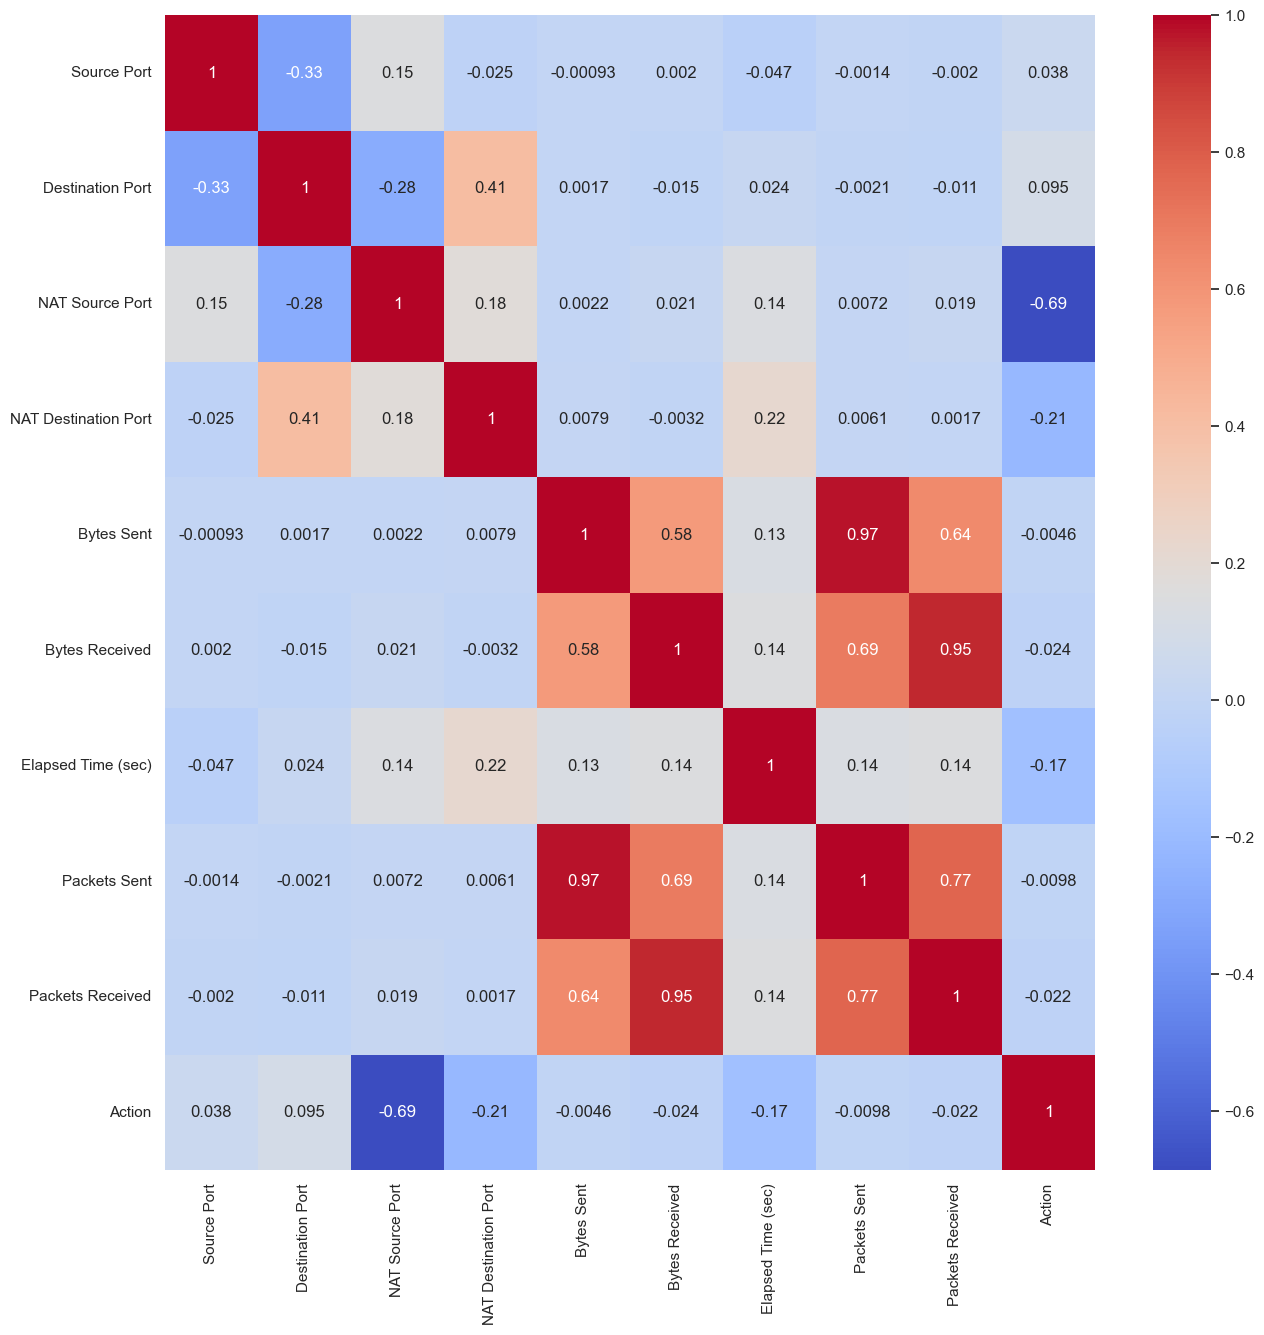

In [15]:
correlation_matrix1 = internet_data.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt

# Show heatmap for one-hot encoding correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.show()

In [16]:
df_new = df[['Bytes Sent', 'Bytes Received', 'Bytes']].copy()
df_new['Cal Total Bytes'] = df_new['Bytes Sent'] + df_new['Bytes Received']
df_new['Valid Bytes'] = df_new['Cal Total Bytes'] == df_new['Bytes']
has_false = not df_new['Valid Bytes'].any()
print(has_false)
df_new

NameError: name 'df' is not defined

In [ ]:
df_new = df[['pkts_sent', 'pkts_received', 'Packets']].copy()
df_new['Cal Total Packets'] = df_new['pkts_sent'] + df_new['pkts_received']
df_new['Valid Packets'] = df_new['Cal Total Packets'] == df_new['Packets']
has_false = not df_new['Valid Packets'].any()
print(has_false)
df_new

Handle Outliers in the dataset

In [ ]:
columns_to_plot = ['Bytes Sent', 'Bytes Received']

plt.figure(figsize=(15, 6))
sns.boxplot(data=internet_data[columns_to_plot])
plt.title('Box Plot for Bytes Sent and Bytes Received')
plt.show()

Perform log transformation on the bytes sent and bytes received

In [ ]:
internet_data['Log Bytes Sent'] = np.log1p(internet_data['Bytes Sent'])
internet_data['Log Bytes Received'] = np.log1p(internet_data['Bytes Received'])

log_columns_to_plot = ['Log Bytes Sent', 'Log Bytes Received']

plt.figure(figsize=(15,6))
sns.boxplot(data=internet_data[log_columns_to_plot])
plt.title('Box Plot for Log-Transformed Bytes')
plt.show()

We notice that there are still outliers after performing a log transofrmation of the bytes sent and bytes received. Since we're analyzing internet traffic data, very large or very small values (in terms of bytes sent/received) might represent legitimate high-usage events or anomalies. Removing or altering these could distort the real insights.

In [ ]:
columns_to_plot = ['Packets Sent', 'Packets Received']

plt.figure(figsize=(15, 6))
sns.boxplot(data=internet_data[columns_to_plot])
plt.title('Box Plot for Packets Sent and Packets Received')
plt.show()

In [ ]:
columns_to_exclude = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

numeric_columns = internet_data.select_dtypes(include=['int64']).drop(columns=columns_to_exclude)

# Calculate Z-scores for the remaining numeric columns
z_scores = stats.zscore(numeric_columns)
abs_z_scores = np.abs(z_scores)

# Identify rows with outliers based on Z-scores (ignoring the excluded columns)
outliers = (abs_z_scores > 3).any(axis=1)

# Select outliers from the original data (without removing the excluded columns from the final result)
outlier_data = internet_data[outliers]

# Display identified outliers
print("Identified Outliers:")
outlier_data

In [ ]:
# Eliminate outliers by selecting rows where `outliers` is False
internet_data_cleaned = internet_data[~outliers]

# Check the cleaned data
print("Data after removing outliers:")
internet_data_cleaned

In [ ]:
columns_to_plot = ['Bytes', 'Bytes Sent', 'Bytes Received']

plt.figure(figsize=(15, 6))
sns.boxplot(data=internet_data_cleaned[columns_to_plot])
plt.title('Box Plot for Bytes After Handling Outliers')
plt.show()